<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Iris dataset 

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [1]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 2 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   iris - aprendizado de maquina por agrupamento - modulo 25 - Ebac.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [2]:
!git commit -m "upload to github file iris - aprendizado de maquina por agrupamento - modulo 25 - Ebac"

On branch main
Your branch is ahead of 'origin/main' by 2 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   iris - aprendizado de maquina por agrupamento - modulo 25 - Ebac.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [248]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning and UserWarning)

In [249]:
iris = sns.load_dataset('iris')

iris = iris.drop(['species'], axis=1)

In [250]:
iris.head().sort_values(['sepal_length'])

,sepal_length,sepal_width,petal_length,petal_width
3,4.6,3.1,1.5,0.2
2,4.7,3.2,1.3,0.2
1,4.9,3.0,1.4,0.2
4,5.0,3.6,1.4,0.2
0,5.1,3.5,1.4,0.2


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

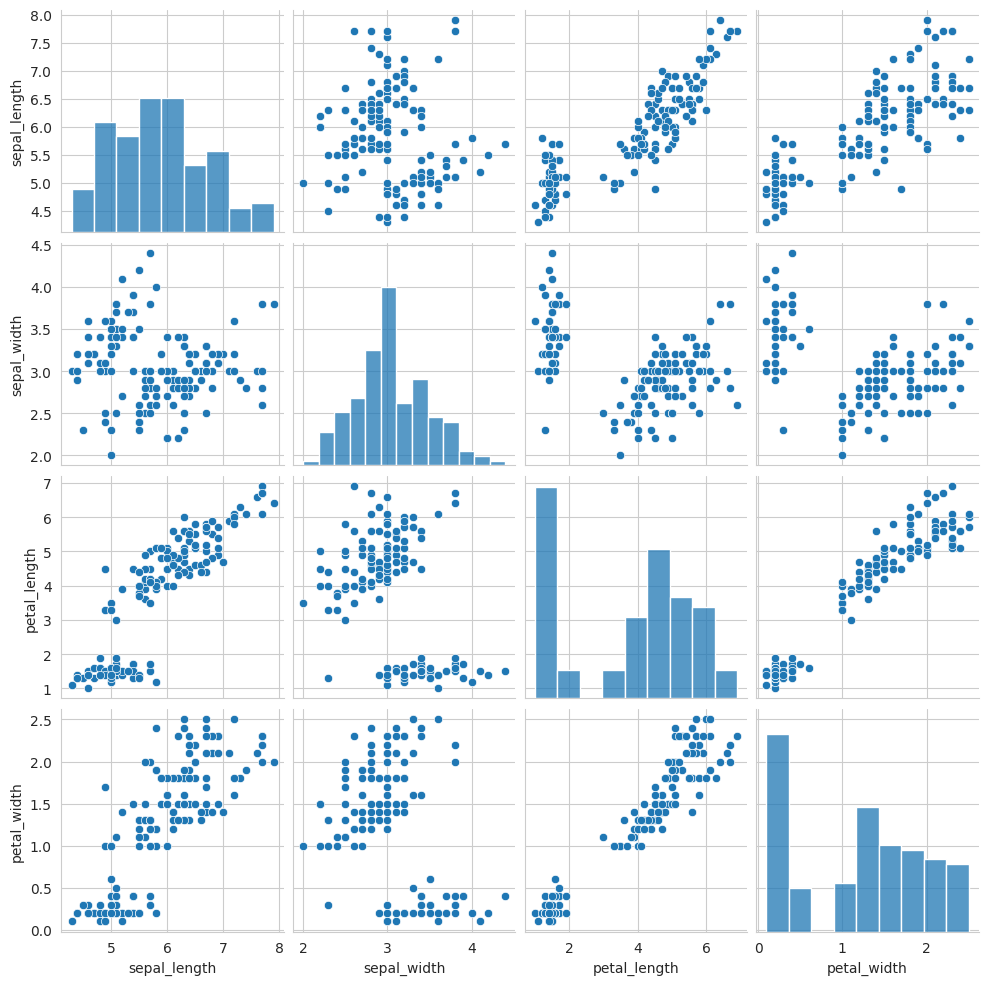

In [251]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

> **Comentários:** 
>
> Ao analisar as características `sepal_length`, `sepal_width`, `petal_length`, `petal_width`, percebe-se que estas podem ser clusterizadas.
>
> No caso do petal, estes estão em grupos de:
>
> `petal_length` alto e `petal_width` alto;
>
> `petal_length` baixo e `petal_width` baixo.

## 2\. Dados 

### **2.1. Valores nulos** 

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [252]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

### **2.2. Variáveis numéricas** 

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [272]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


> **Resposta**
>
> Não é necessário, pois todas as variáveis seguem o mesmo padrão escalar!

<hr>

### **2.3. Limpeza** 

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

> **Resposta**
>
> Não é necessário descartar nenhuma coluna!

<hr>

## 3\. Modelagem 

### **3.1. Treino** 

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [255]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []

for k in range(1, 11):
  model = KMeans(n_clusters=k)
  model = model.fit(iris)
  wcss.append(model.inertia_)

### **3.2. Avaliação** 

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

In [257]:
clusters = model.labels_

clusters = pd.DataFrame(clusters, columns=['cluster'])

iris_clustered = pd.concat([iris, clusters], axis=1)

iris_clustered.head().sort_values(['cluster'])

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
4,5.0,3.6,1.4,0.2,1
1,4.9,3.0,1.4,0.2,7
2,4.7,3.2,1.3,0.2,7
3,4.6,3.1,1.5,0.2,7


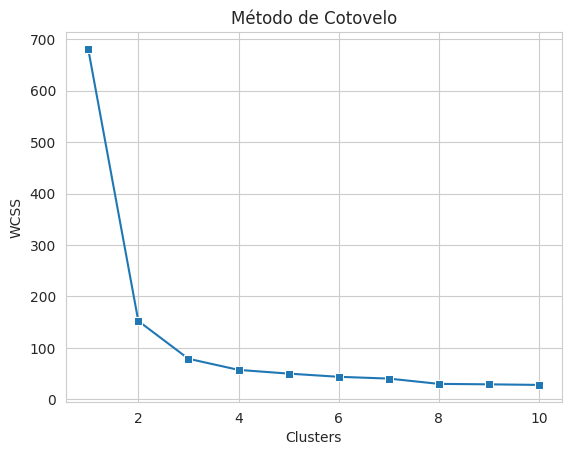

In [259]:
with sns.axes_style('whitegrid'):

    grafico = sns.lineplot(x=range(1,11), y=wcss, marker='s')

    grafico.set(title='Método de Cotovelo', xlabel='Clusters', ylabel='WCSS')

- **2 Clusters**

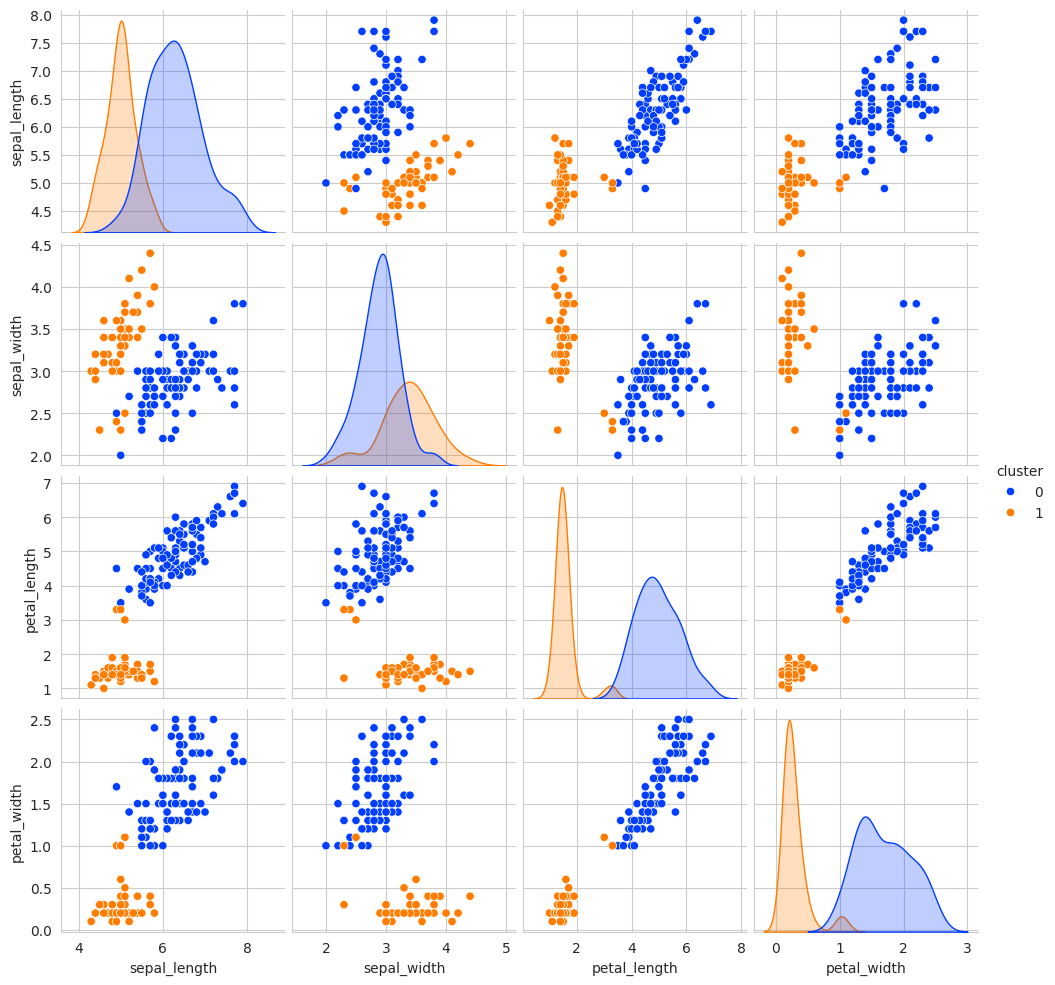

In [260]:
import pandas as pd

model_2_clusters = KMeans(n_clusters= 2)
model_2_clusters = model_2_clusters.fit(iris)

clusters = model_2_clusters.labels_

iris_model_2_clusters = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

    grafico = sns.pairplot(data=iris_model_2_clusters, hue='cluster', palette='bright')

<hr>

- **3 Clusters**

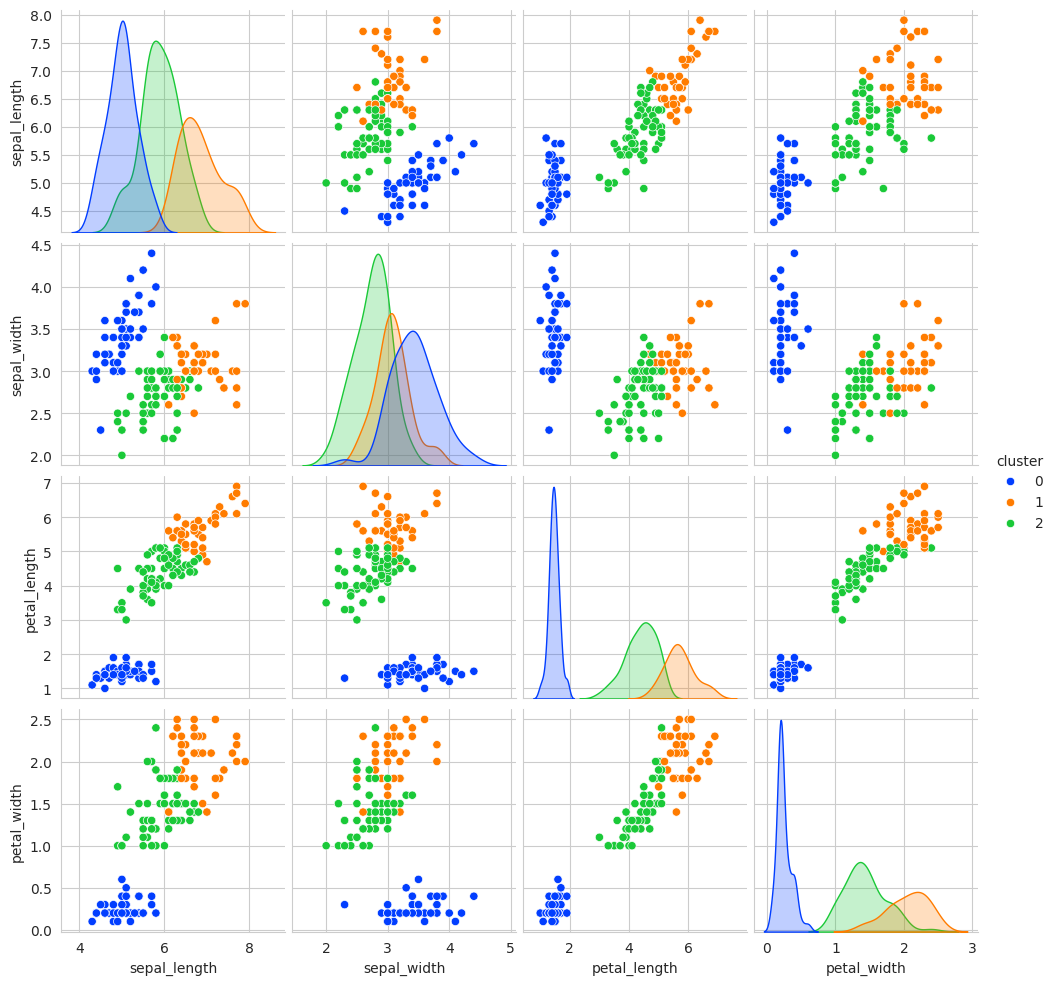

In [261]:
import pandas as pd

model_3_clusters = KMeans(n_clusters= 3)
model_3_clusters = model_3_clusters.fit(iris)

clusters = model_3_clusters.labels_

iris_model_3_clusters = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

    grafico = sns.pairplot(data=iris_model_3_clusters, hue='cluster', palette='bright')

<hr>

- **4 Clusters**

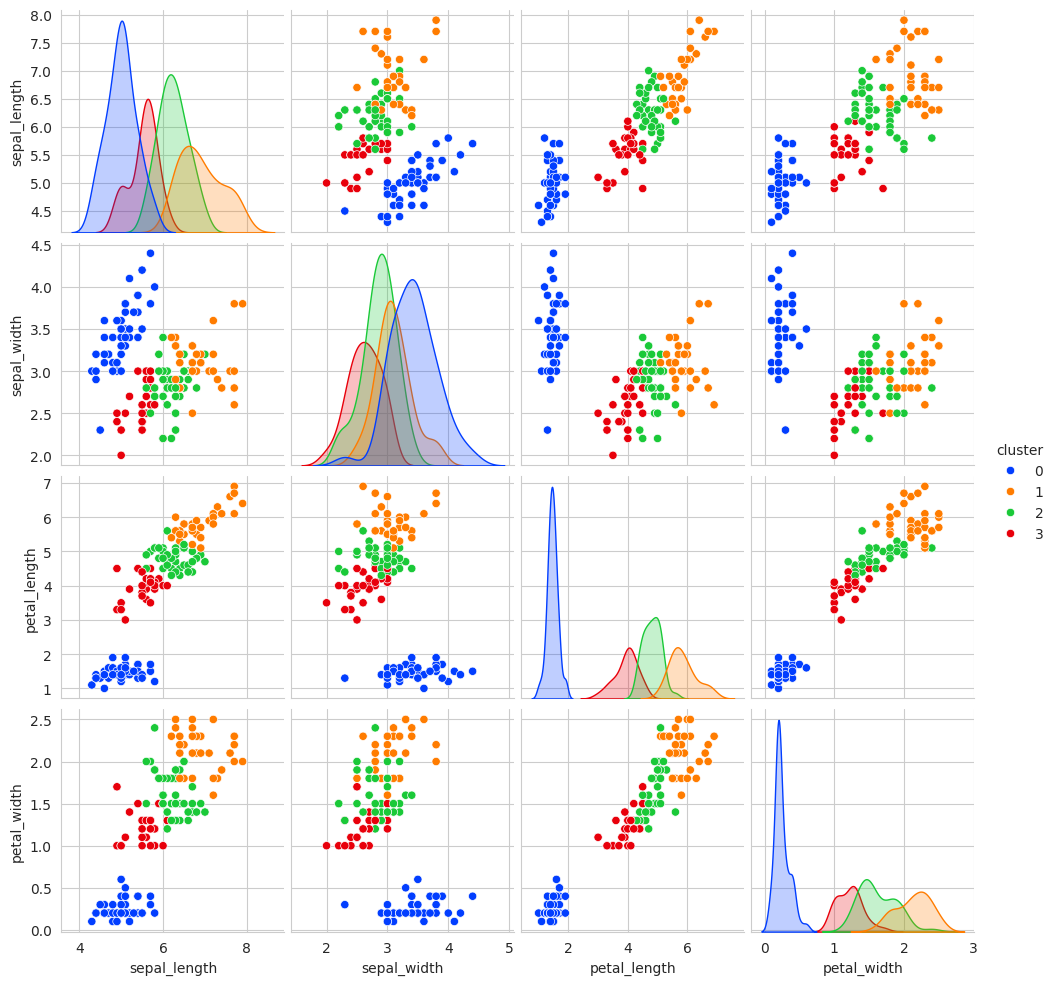

In [262]:
import pandas as pd

model_4_clusters = KMeans(n_clusters= 4)
model_4_clusters = model_4_clusters.fit(iris)

clusters = model_4_clusters.labels_

iris_model_4_clusters = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

    grafico = sns.pairplot(data=iris_model_4_clusters, hue='cluster', palette='bright')

<hr>

- **5 Clusters**

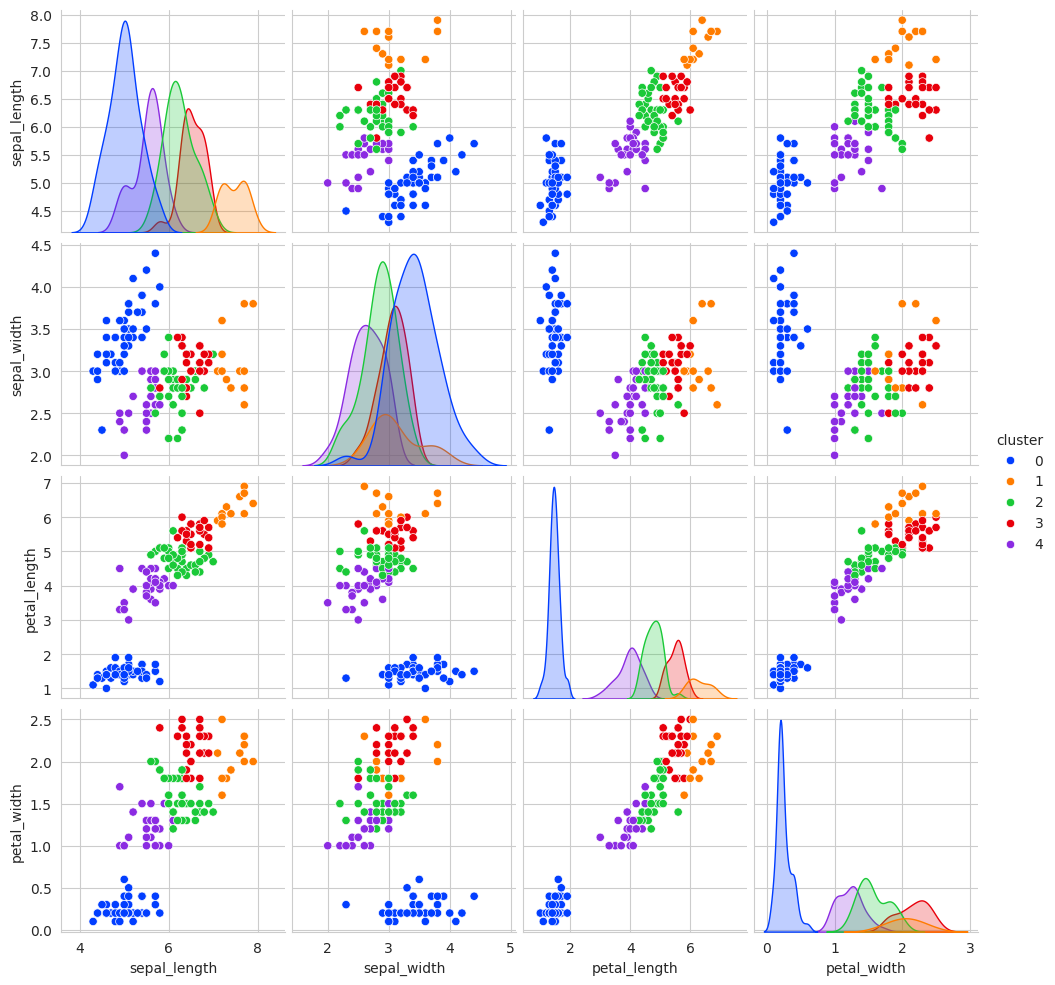

In [263]:
import pandas as pd

model_5_clusters = KMeans(n_clusters= 5)
model_5_clusters = model_5_clusters.fit(iris)

clusters = model_5_clusters.labels_

iris_model_5_clusters = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

    grafico = sns.pairplot(data=iris_model_5_clusters, hue='cluster', palette='bright')

> **Comentário:**
> 
> O gráfico com 3 clusters parece ser o mais apropriado, sendo que, divide bem os grupos com as características `petal_width` e `petal_length`.

<hr>

### **3.3. Visualização** 

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [264]:
three_model_cluster = KMeans(n_clusters=3)

three_model_cluster = three_model_cluster.fit(iris)

clusters = three_model_cluster.labels_

x = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

x.tail()

,sepal_length,sepal_width,petal_length,petal_width,cluster
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,2


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

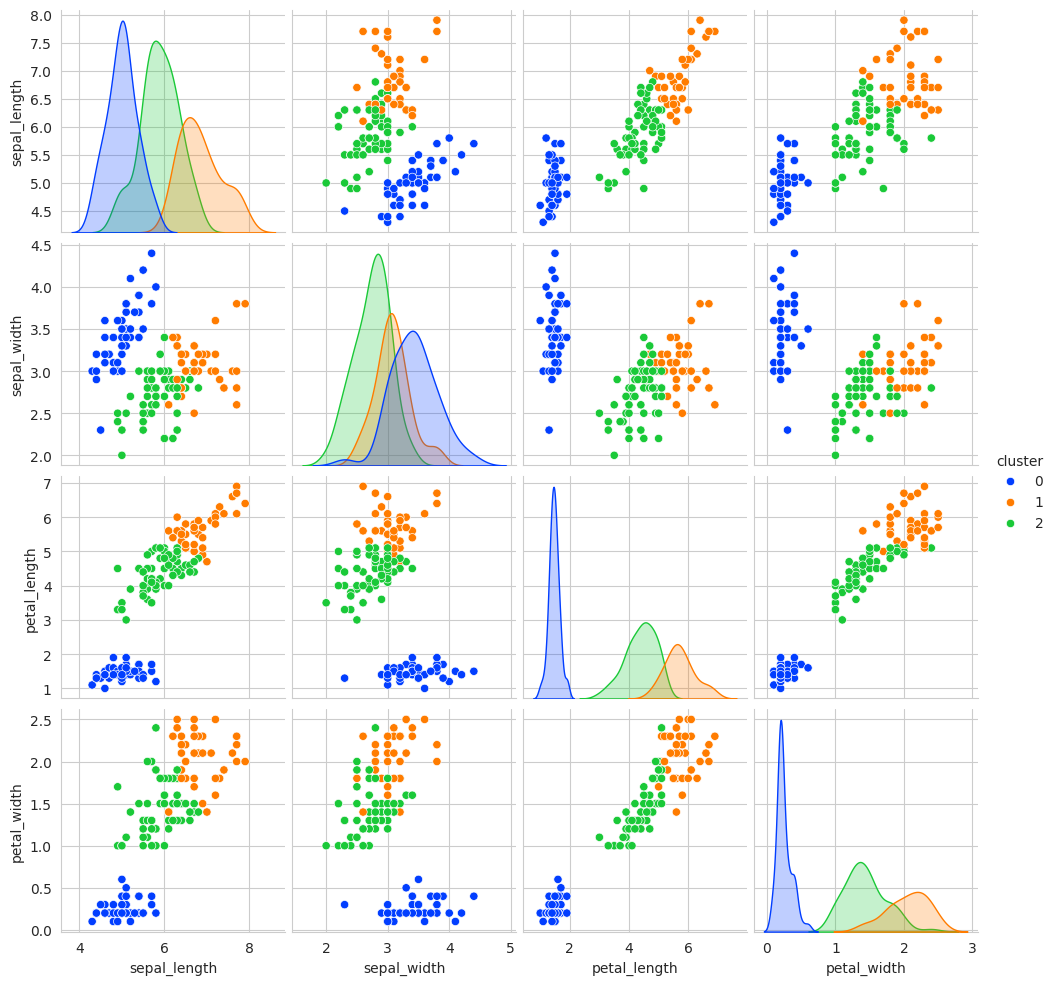

In [265]:
with sns.axes_style('whitegrid'):

    grafico = sns.pairplot(data=x, hue='cluster', palette='bright')

> **Comentários:** 
>
> O `petal width` é menor para o cluster 1;
>
> O `petal width` é maior nos clusters 0 é 2; 
>
> O `sepal width` esta distribuído entre 3 e 4 cm;
>
> O cluster 2 apresenta maior `petal length`; 
>
> O valor de corte esta em aproximadamente 5 cm no `petal length` entre os clusters 0 e 2.

## 4\. Predição  

### **4.1. Nova flor** 

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [268]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [271]:
new_iris = np.array([5.1, 3.5, 1.4, 0.2])

new_iris_cluster = model.predict(new_iris.reshape( 1, -1))

print(f'A iris predita esta relaciona com o cluster {new_iris_cluster}')

A iris predita esta relaciona com o cluster [1]


---